<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://dl.dropboxusercontent.com/u/37919918/hedaro/pandas-ipython-tutorials-hedaro.jpg" title="Tensorflow Tutorial | Hedaro" alt="Tensorflow Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Tensorflow Tutorial -->  
	  <center>
	    <br>
        <h1>Tensorflow</h1>
        <p><center>08 - Lesson</center></p>
	  </center>	
    <!-- Tensorflow Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

# Deep Learning Using Tensorflow

In this lesson you are going to try to create a model that supases the one you created in Lesson 07 using a ***Deep Learning*** NN. 

> What is deep learning? 

This is just a term to describe neural networks that are composed of more than one hidden layer. The good news is that it is pretty easy to go from one to many hidden layers and your predictions should also improve.

# Let's Get to Work!

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.1 |Anaconda custom (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 0.12.0-rc0
Pandas version 0.19.0
Numpy version 1.11.0


# Function to model

    y = a * x^2 + b * x + c  


In [3]:
# Let's generate 1000 random samples
pool = np.random.rand(1000,1).astype(np.float32)

# Shuffle the samples
np.random.shuffle(pool)

# sample size of 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 85% training
train_x = pool[sample:]

print('Testing data points: ' + str(test_x.shape))
print('Training data points: ' + str(train_x.shape))

# Let's compute the ouput using 2 for a, 3 for b, and 5 for c
test_y = 2.0 * test_x**2 + 3.0 * test_x + 5
train_y = 2.0 * train_x**2 + 3.0 * train_x + 5

Testing data points: (150, 1)
Training data points: (850, 1)


In [4]:
df = pd.DataFrame({'x':train_x[:,0],
                   'y':train_y[:,0]})
df.head()

x         y
0  0.893087  9.274470
1  0.228767  5.790971
2  0.221778  5.763705
3  0.358818  6.333954
4  0.670501  7.910648

In [5]:
df.describe()

x           y
count  850.000000  850.000000
mean     0.513619    7.231572
std      0.285743    1.443670
min      0.000367    5.001102
25%      0.268467    5.949554
50%      0.519524    7.098381
75%      0.751917    8.386510
max      0.999042    9.993294

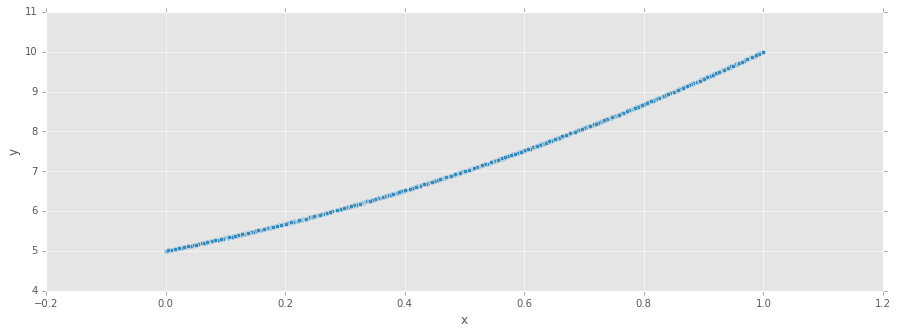

In [6]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

# Helper Functions  

Make a function that will help you create layers easily

In [7]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    
    # tf.random_normal([what is the size of your batches, size of output layer])
    Weights = tf.Variable(tf.truncated_normal([in_size, out_size], mean=0.1, stddev=0.1))
    
    # tf.random_normal([size of output layer])
    biases = tf.Variable(tf.truncated_normal([out_size], mean=0.1, stddev=0.1))
    
    # shape of pred = [size of your batches, size of output layer]
    pred = tf.matmul(inputs, Weights) + biases

    if activation_function is None:
        outputs = pred
    else:
        outputs = activation_function(pred)
    return outputs

# Model your Graph

Start to use W (for weight) and b (for bias) when setting up your variables. Aside from adding your ReLU activation function, it is a good idea to use Tensorflow's ***matrix multiplication function (matmul)*** as shown below.  

> The ? in the shape output just means it can be of any shape.

For the shape parameter, you can think of it like this...  

> shape = [how many data points do you have, how many features does each data point have]  

For this lesson since we are doing a simple regression, we only have one feature (x). We use the ***None*** keyword so that we are not restricted on the number of samples to feed our model. This will become more important when you learn about training using batches on a future lesson.

In [8]:
# you can adjust the number of neurons in the hidden layers here
hidden_size = 100

# placeholders
# shape=[how many samples do you have, how many input neurons]
x = tf.placeholder(tf.float32, shape=[None, 1], name="01_x")
y = tf.placeholder(tf.float32, shape=[None, 1], name="01_y")

print("shape of x and y:")
print(x.get_shape(),y.get_shape())

shape of x and y:
(?, 1) (?, 1)


Note that the input of one layer becomes the input of the next layer.

In [9]:
# create your hidden layers!
h1 = add_layer(x, 1, hidden_size, tf.nn.relu)
h2 = add_layer(h1, hidden_size, hidden_size, tf.nn.relu)

print("shape of hidden layers:")
print(h1.get_shape(), h2.get_shape())

shape of hidden layers:
(?, 100) (?, 100)


In [10]:
# Output Layers
pred = add_layer(h2, hidden_size, 1)

print("shape of output layer:")
print(pred.get_shape())

shape of output layer:
(?, 1)


In [11]:
# minimize the mean squared errors.
loss = tf.reduce_mean(tf.square(pred - y))

# pick optimizer
optimizer = tf.train.GradientDescentOptimizer(0.003)
train = optimizer.minimize(loss)

# How Good is Your model?  

Set up the following variables to calculate the accuracy rate of your model. You will do that shortly.

In [12]:
# check accuracy of model
correct_prediction = tf.equal(tf.round(pred), tf.round(y))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Training Time!  

The best score I was able to obtain was a ***~98% accuracy*** using a LR of 0.003 and iterating 3,000 times. As you can see adding additional layers made a big difference.

In [13]:
# initialize the variables
init = tf.global_variables_initializer()

# hold step and error values
t = []

# Run your graph
with tf.Session() as sess:
    
    # initialize variables
    sess.run(init)

    # Fit the function.
    for step in range(3000):

        # get your data
        train_data = {x:train_x, y:train_y}
        test_data = {x:test_x, y:test_y}
        
        # training in progress...
        train_loss, train_pred = sess.run([loss, train], feed_dict=train_data)        
        
        # print every n iterations
        if step%200==0:
           
            # capture the step and error for analysis
            t.append((step, train_loss))    
            
            # get snapshot of current training accuracy       
            train_acc = accuracy.eval(train_data)            
                
            print("Training loss at step %d: %f" % (step, train_loss))                              
            
    # here is where you see how good of a Data Scientist you are        
    print("Accuracy on the Training Set:", accuracy.eval(train_data) )
    print("Accuracy on the Test Set:", accuracy.eval(test_data) )
    
    # capture predictions on test data 
    test_results = sess.run(pred, feed_dict={x:test_x})  
    df_final = pd.DataFrame({'test_x':test_x[:,0],
                             'pred':test_results[:,0]})
    
    # capture training and validation loss
    df_loss = pd.DataFrame(t, columns=['step', 'train_loss'])  

Training loss at step 0: 24.740967
Training loss at step 200: 0.011177
Training loss at step 400: 0.008205
Training loss at step 600: 0.006540
Training loss at step 800: 0.005518
Training loss at step 1000: 0.004823
Training loss at step 1200: 0.004345
Training loss at step 1400: 0.004003
Training loss at step 1600: 0.003737
Training loss at step 1800: 0.003520
Training loss at step 2000: 0.003333
Training loss at step 2200: 0.003168
Training loss at step 2400: 0.003019
Training loss at step 2600: 0.002884
Training loss at step 2800: 0.002759
Accuracy on the Training Set: 0.971765
Accuracy on the Test Set: 0.98


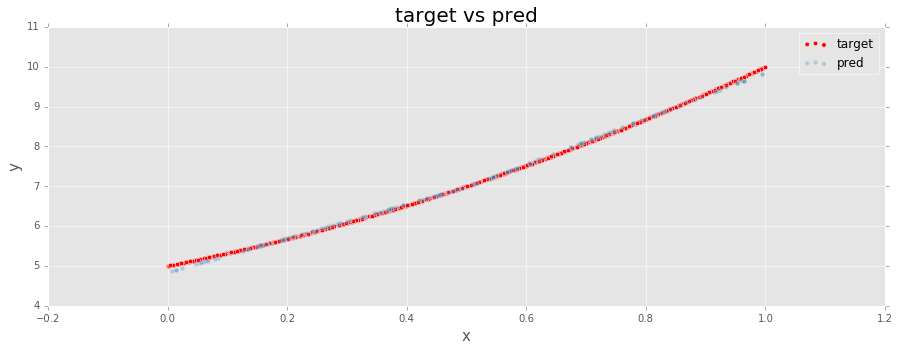

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15)
axes.legend(["target", "pred"], loc='best');

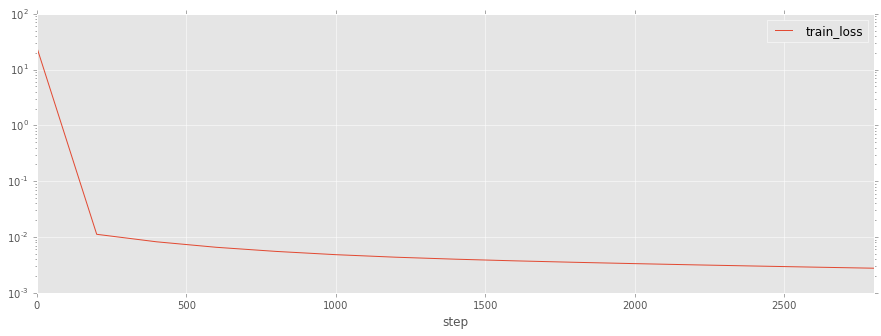

In [15]:
df_loss.set_index('step').plot(logy=True, figsize=(15,5));

# Your Turn  

> Try different sizes of neurons, learning rates, and iterations. You will notice that changing any one of these parameters will require you to change another one. Try to get a feel of this model and how it is affected by tweaking it. If you are bold enough, try to add even more layers and see what happens. In the next lesson we are going to talk about Validation.

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>